# Plotando boxplots

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import func
import importlib

### Preparando os dados:

In [100]:
ds = pd.read_csv("mxmh_survey_results.csv")

In [115]:
importlib.reload(func)

<module 'func' from 'C:\\Users\\Toscano\\Desktop\\Projeto-ICD\\func.py'>

In [102]:
func.alterar_type(ds)

In [103]:
colunas_traduzidas = [
    "data_e_hora_envio", "idade", "servico_de_streaming_principal",
    "horas_por_dia", "enquanto_trabalha",
    "instrumentalista", "compositor", "genero_fav",
    "exploratorio", "em_outros_idiomas", "bpm",
    "frequencia_musica_classica", "frequencia_country",
    "frequencia_edm", "frequencia_folk", "frequencia_gospel",
    "frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop",
    "frequencia_latin", "frequencia_lofi", "frequencia_metal",
    "frequencia_pop", "frequencia_rb", "frequencia_rap",
    "frequencia_rock", "frequencia_musica_videogame",
    "ansiedade", "depressao", "insonia", "toc",
    "efeitos_na_saude_mental", "permissoes"
]

In [104]:
ds.columns = colunas_traduzidas

In [105]:
ds.head()

,data_e_hora_envio,idade,servico_de_streaming_principal,horas_por_dia,enquanto_trabalha,instrumentalista,compositor,genero_fav,exploratorio,em_outros_idiomas,...,frequencia_rb,frequencia_rap,frequencia_rock,frequencia_musica_videogame,ansiedade,depressao,insonia,toc,efeitos_na_saude_mental,permissoes
0,8/27/2022 19:29:02,18.0,Spotify,3.0,1.0,1.0,1.0,Latin,1.0,1.0,...,2.0,3.0,0.0,2.0,3.0,0.0,1.0,0.0,NaN,I understand.
1,8/27/2022 19:57:31,63.0,Pandora,1.5,1.0,0.0,0.0,Rock,1.0,0.0,...,2.0,1.0,3.0,1.0,7.0,2.0,2.0,1.0,NaN,I understand.
2,8/27/2022 21:28:18,18.0,Spotify,4.0,0.0,0.0,0.0,Video game music,0.0,1.0,...,0.0,1.0,1.0,3.0,7.0,7.0,10.0,2.0,No effect,I understand.
3,8/27/2022 21:40:40,61.0,YouTube Music,2.5,1.0,0.0,1.0,Jazz,1.0,1.0,...,2.0,0.0,0.0,0.0,9.0,7.0,3.0,3.0,Improve,I understand.
4,8/27/2022 21:54:47,18.0,Spotify,4.0,1.0,0.0,0.0,R&B,1.0,0.0,...,3.0,3.0,0.0,1.0,7.0,2.0,5.0,9.0,Improve,I understand.


### Exibindo os Boxplots:

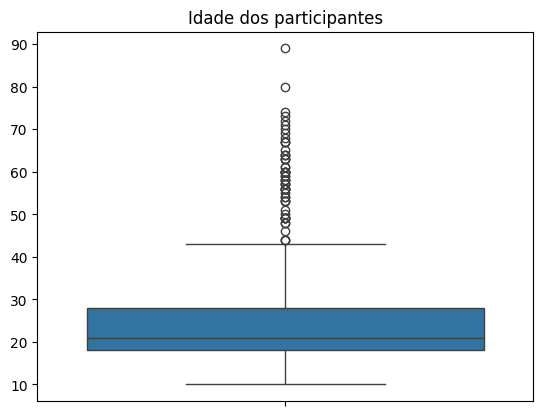

In [106]:
func.exibir_boxplot(ds, "idade", "v", "Idade dos participantes")

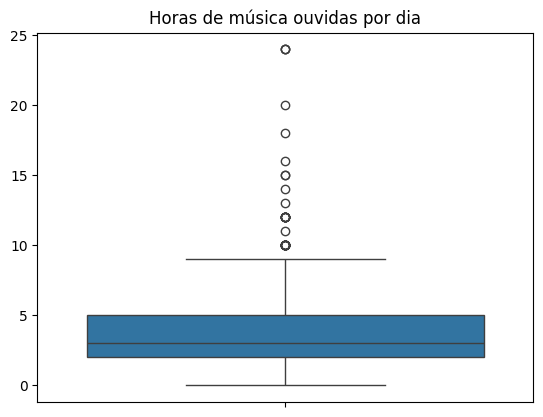

In [126]:
func.exibir_boxplot(ds, "horas_por_dia", "v", "Horas de música ouvidas por dia")

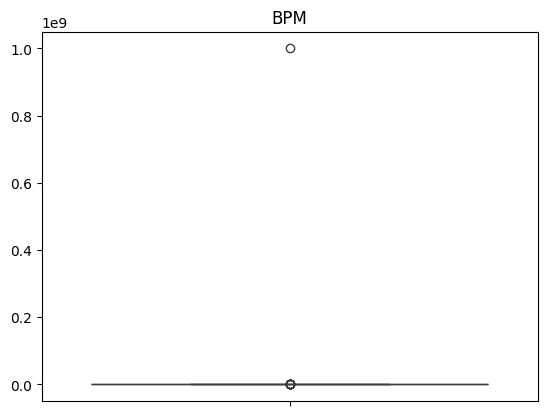

In [108]:
func.exibir_boxplot(ds, "bpm", "v", "BPM")

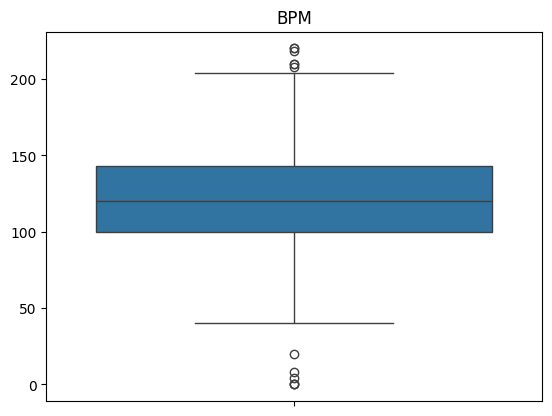

In [118]:
media_bpm = ds["bpm"].mean()
ds.loc[(ds["bpm"] > 300, "bpm")] = media_bpm
func.exibir_boxplot(ds, "bpm", "v", "BPM")

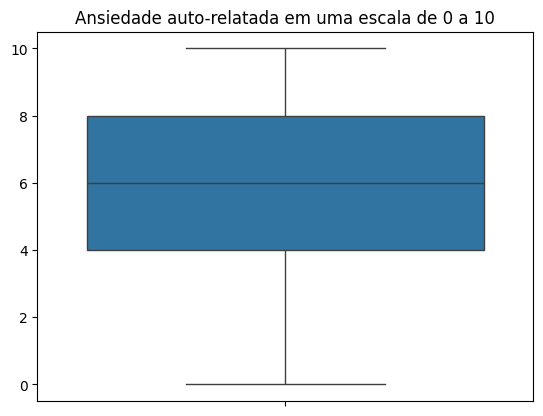

In [110]:
func.exibir_boxplot(ds, "ansiedade", "v", "Ansiedade auto-relatada em uma escala de 0 a 10")

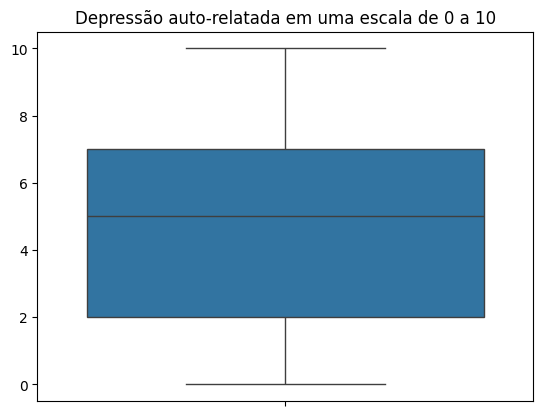

In [111]:
func.exibir_boxplot(ds, "depressao", "v", "Depressão auto-relatada em uma escala de 0 a 10")

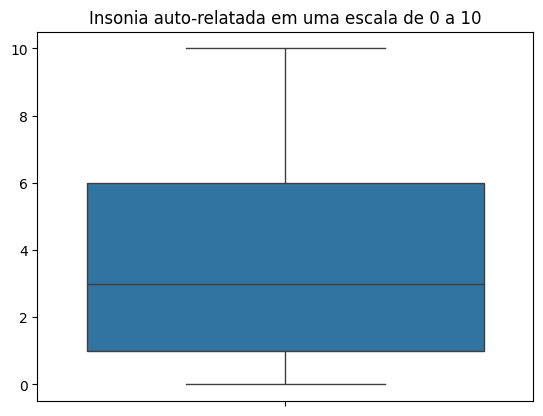

In [112]:
func.exibir_boxplot(ds, "insonia", "v", "Insonia auto-relatada em uma escala de 0 a 10")

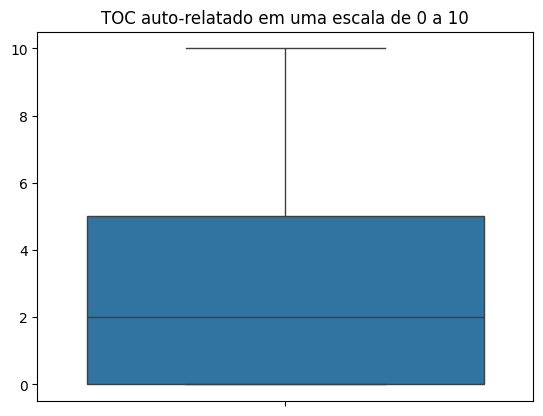

In [113]:
func.exibir_boxplot(ds, "toc", "v", "TOC auto-relatado em uma escala de 0 a 10")

### Exibindo vários boxplots de mesma categoria:

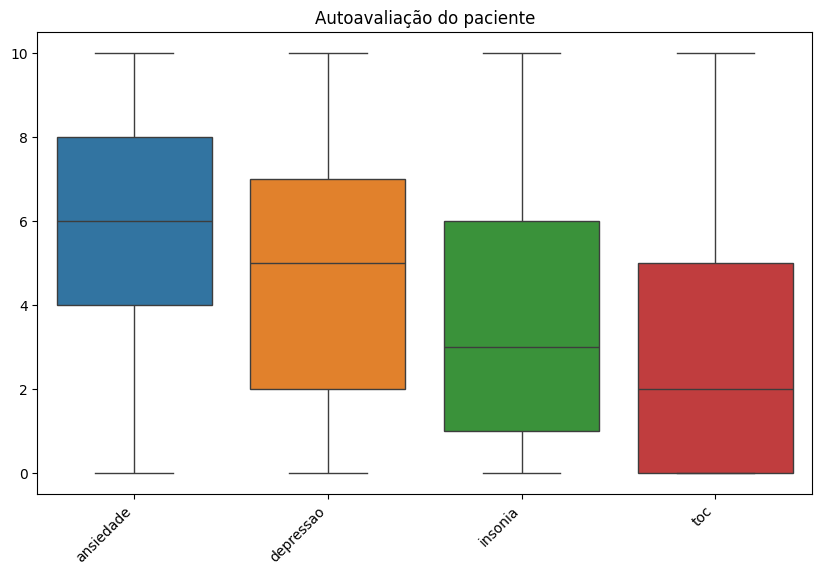

In [120]:
func.boxplot_de_varias(ds, "Autoavaliação do paciente", 10, 6, "ansiedade", "depressao", "insonia", "toc")

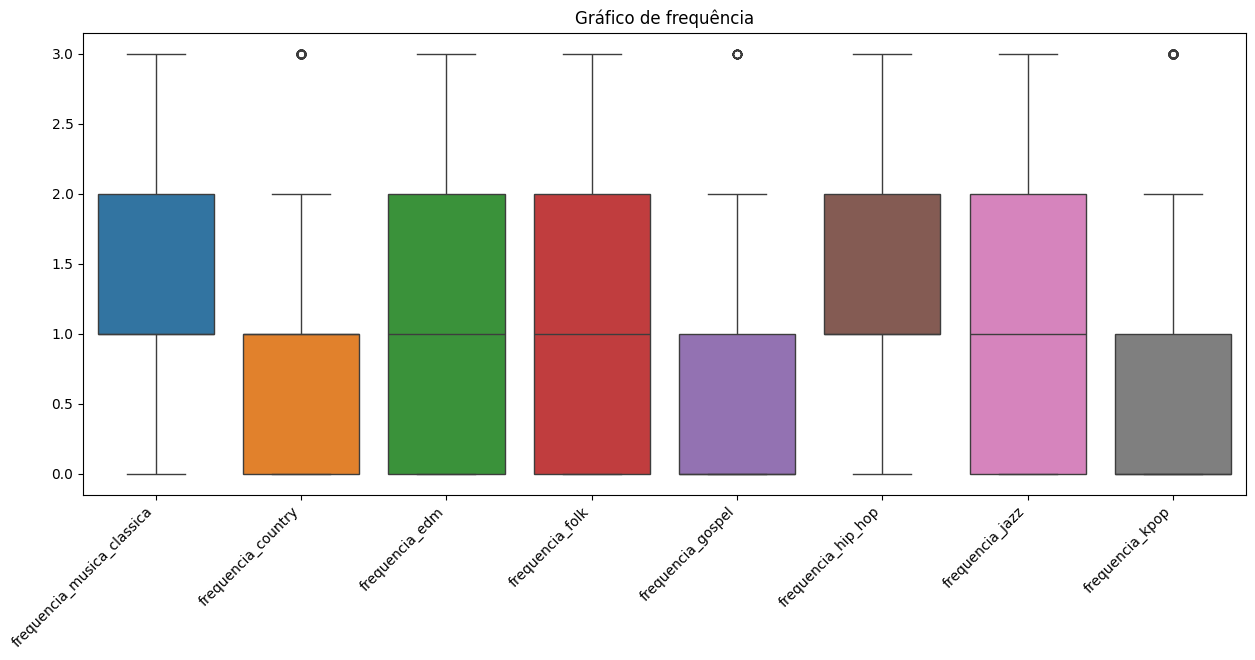

In [125]:
func.boxplot_de_varias(ds, "Gráfico de frequência", 15, 6, "frequencia_musica_classica", "frequencia_country","frequencia_edm", "frequencia_folk", "frequencia_gospel","frequencia_hip_hop", "frequencia_jazz", "frequencia_kpop")

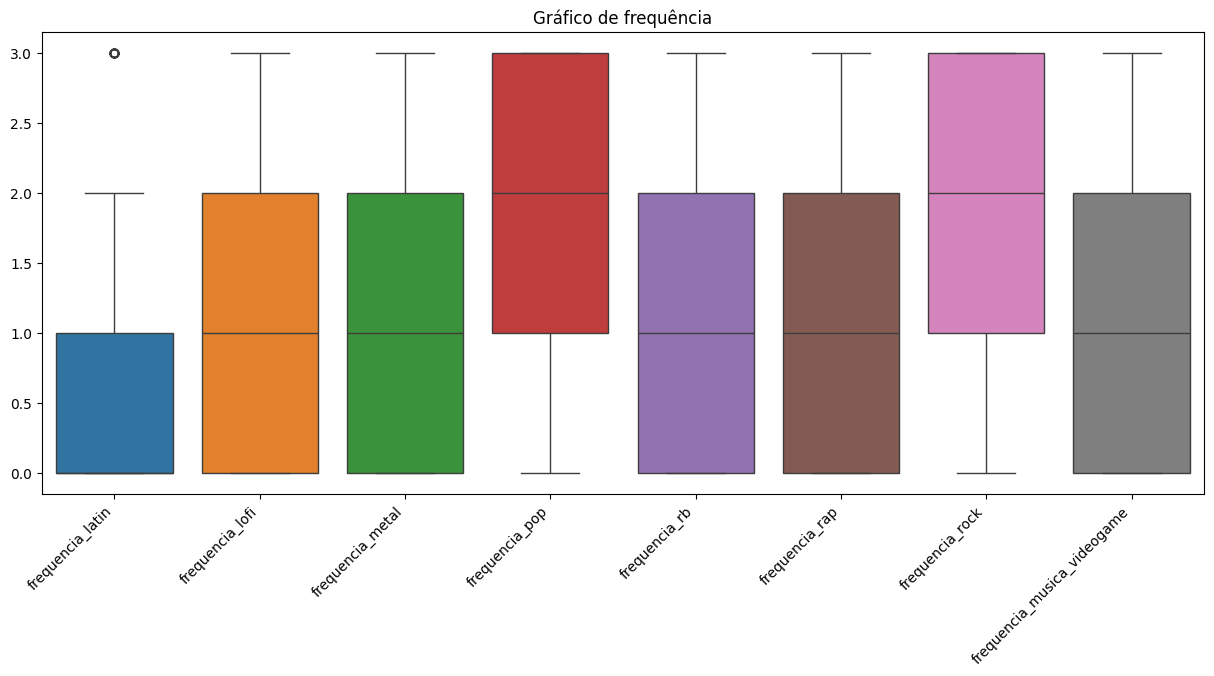

In [124]:
func.boxplot_de_varias(ds, "Gráfico de frequência", 15, 6, "frequencia_latin", "frequencia_lofi", "frequencia_metal", "frequencia_pop", "frequencia_rb", "frequencia_rap","frequencia_rock", "frequencia_musica_videogame")